In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob
from collections import defaultdict

In [2]:
# Init dense results with a defaultdict
dense_results = defaultdict(lambda: defaultdict(list))
#print(info)
# Read data for dense outputs
inputs = glob.glob("dense/*.out")
#print(inputs)
for inp in inputs:
    test = inp.split(".")[-3].split("/")[-1]
    lmax = int(inp.split(".")[-2])
    #print("Read dense result:", inp)
    #print(test, lmax)
    with open(inp, "r") as fd:
        lines = fd.readlines()
    #print(lines)
    res = dense_results[lmax]
    res["N"].append(int(lines[-3].split()[0]))
    res["energy"].append(float(lines[-2].split()[-1]))
    res["time"].append(float(lines[-1].split()[-1]))
print("Finish reading dense results")
# Sort results by number of atoms
for res in dense_results.values():
    order = np.argsort(res["N"])
    res["N"] = np.array(res["N"])[order]
    res["energy"] = np.array(res["energy"])[order]
    res["time"] = np.array(res["time"])[order]
    #print(res)
print("Finish sorting dense results")
#print(dense_results)

# Init FMM results with a defaultdict
fmm_results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
# Read data for FMM outputs
inputs = glob.glob("fmm/*.out")
#print(inputs)
for inp in inputs:
    test = inp.split(".")[-4].split("/")[-1]
    pmax = int(inp.split(".")[-2])
    lmax = int(inp.split(".")[-3])
    #print("Read FMM result:", inp)
    #print(test, lmax, pmax)
    with open(inp, "r") as fd:
        lines = fd.readlines()
    #print(lines)
    res = fmm_results[lmax][pmax]
    res["N"].append(int(lines[-3].split()[0]))
    res["energy"].append(float(lines[-2].split()[-1]))
    res["time"].append(float(lines[-1].split()[-2]))
print("Finish reading FMM results")
# Sort results by number of atoms
for res_lmax in fmm_results.values():
    for res in res_lmax.values():
        order = np.argsort(res["N"])
        res["N"] = np.array(res["N"])[order]
        res["energy"] = np.array(res["energy"])[order]
        res["time"] = np.array(res["time"])[order]
        #print(res)
print("Finish sorting FMM results")
#print(fmm_results)

Finish reading dense results
Finish sorting dense results
Finish reading FMM results
Finish sorting FMM results


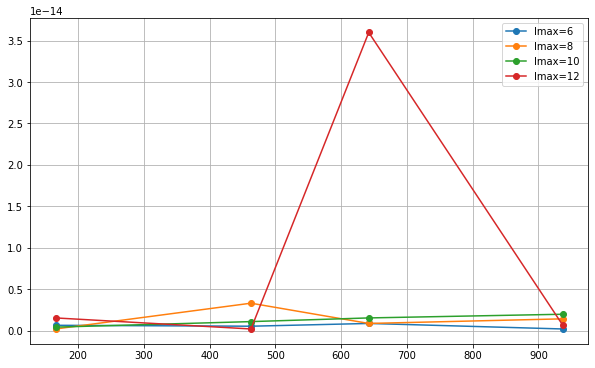

In [3]:
# Accuracy of FMM with pmax=40 for different lmax
# Just to show that we can use it as a baseline value for accuracy
lmaxs = sorted(dense_results.keys())
pmax = 40
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
for lmax in lmaxs:
    dense_energy = dense_results[lmax]["energy"]
    dense_N = dense_results[lmax]["N"]
    if (pmax not in fmm_results[lmax].keys()):
        print("No pmax=40 results for lmax={}".format(lmax))
        continue
    fmm_energy = fmm_results[lmax][pmax]["energy"]
    fmm_N = fmm_results[lmax][pmax]["N"]
    ind = fmm_N.searchsorted(dense_N)
    x = []
    y = []
    for (i, j, a) in zip(ind, dense_N, dense_energy):
        if ((i < len(fmm_N)) and (fmm_N[i] == j)):
            x.append(j)
            y.append(abs(fmm_energy[i]/a - 1))
            #print(i, a, fmm_N[i])
    ax.plot(x, y, label="lmax={}".format(lmax), marker="o")
ax.grid()
ax.legend()

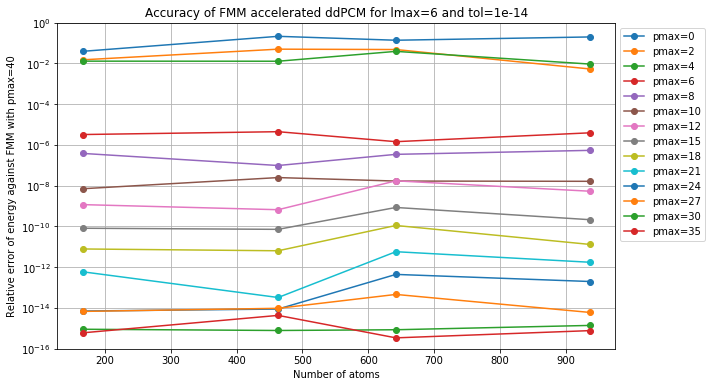

In [4]:
# Print data for lmax=6
lmax = 6
#pmaxs = [0, 4, 6, 8, 10, 12, 15, 21, 30]
pmaxs = sorted(fmm_results[lmax].keys())[:-1]
baseline_energy = fmm_results[lmax][40]["energy"]
baseline_N = fmm_results[lmax][40]["N"]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
#ax.scatter(baseline_N, baseline_energy, label="dense")
for pmax in pmaxs:
    fmm_energy = fmm_results[lmax][pmax]["energy"]
    fmm_N = fmm_results[lmax][pmax]["N"]
    if (len(baseline_N) != len(fmm_N)):
        print("pmax={} ignored due to incomplete data".format(pmax))
        continue
    diff = np.abs(fmm_energy-baseline_energy) / np.abs(baseline_energy)
    plt.plot(baseline_N, diff, label="pmax={}".format(pmax), marker="o")
ax.set_yscale("log")
ax.set_ylim([1e-16, 1e-0])
ax.set_yticks(1e-0 * 1e-2**np.arange(9))
ax.set_xlabel("Number of atoms")
ax.set_ylabel("Relative error of energy against FMM with pmax=40")
ax.set_title("Accuracy of FMM accelerated ddPCM for lmax={} and tol=1e-14".format(lmax))
ax.legend(bbox_to_anchor=(1,1))
ax.grid()

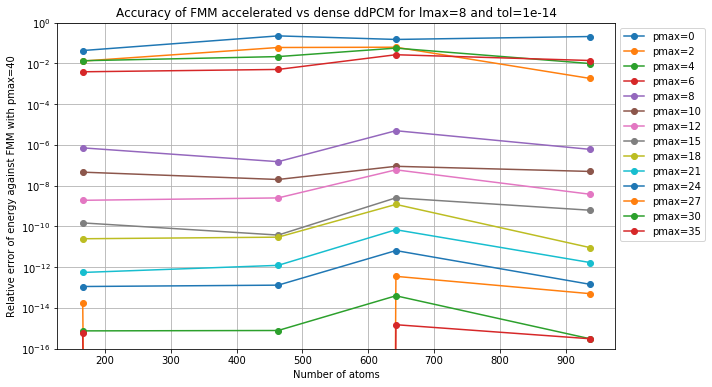

In [5]:
# Print data for lmax=8
lmax = 8
#pmaxs = [0, 6, 8, 10, 12, 15, 21, 30, 35, 40]
pmaxs = sorted(fmm_results[lmax].keys())[:-1]
baseline_energy = fmm_results[lmax][40]["energy"]
baseline_N = fmm_results[lmax][40]["N"]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
#ax.scatter(baseline_N, baseline_energy, label="dense")
for pmax in pmaxs:
    fmm_energy = fmm_results[lmax][pmax]["energy"]
    fmm_N = fmm_results[lmax][pmax]["N"]
    if(len(baseline_N) != len(fmm_N)):
        print("pmax={} ignored due to incomplete data".format(pmax))
        continue
    diff = np.abs(fmm_energy-baseline_energy) / np.abs(baseline_energy)
    plt.plot(baseline_N, diff, label="pmax={}".format(pmax), marker="o")
ax.set_yscale("log")
ax.set_ylim([1e-16, 1e-0])
ax.set_yticks(1e-0 * 1e-2**np.arange(9))
ax.set_xlabel("Number of atoms")
ax.set_ylabel("Relative error of energy against FMM with pmax=40")
ax.set_title("Accuracy of FMM accelerated vs dense ddPCM for lmax={} and tol=1e-14".format(lmax))
ax.legend(bbox_to_anchor=(1,1))
ax.grid()

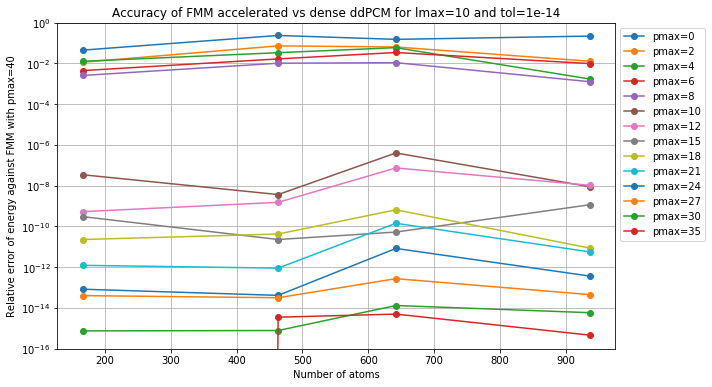

In [6]:
# Print data for lmax=10
lmax = 10
#pmaxs = [0, 6, 8, 10, 12, 15, 21, 30, 35, 40]
pmaxs = sorted(fmm_results[lmax].keys())[:-1]
baseline_energy = fmm_results[lmax][40]["energy"]
baseline_N = fmm_results[lmax][40]["N"]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
#ax.scatter(baseline_N, baseline_energy, label="dense")
for pmax in pmaxs:
    fmm_energy = fmm_results[lmax][pmax]["energy"]
    fmm_N = fmm_results[lmax][pmax]["N"]
    if(len(baseline_N) != len(fmm_N)):
        print("pmax={} ignored due to incomplete data".format(pmax))
        continue
    diff = np.abs(fmm_energy-baseline_energy) / np.abs(baseline_energy)
    plt.plot(baseline_N, diff, label="pmax={}".format(pmax), marker="o")
ax.set_yscale("log")
ax.set_ylim([1e-16, 1e-0])
ax.set_yticks(1e-0 * 1e-2**np.arange(9))
ax.set_xlabel("Number of atoms")
ax.set_ylabel("Relative error of energy against FMM with pmax=40")
ax.set_title("Accuracy of FMM accelerated vs dense ddPCM for lmax={} and tol=1e-14".format(lmax))
ax.legend(bbox_to_anchor=(1,1))
ax.grid()

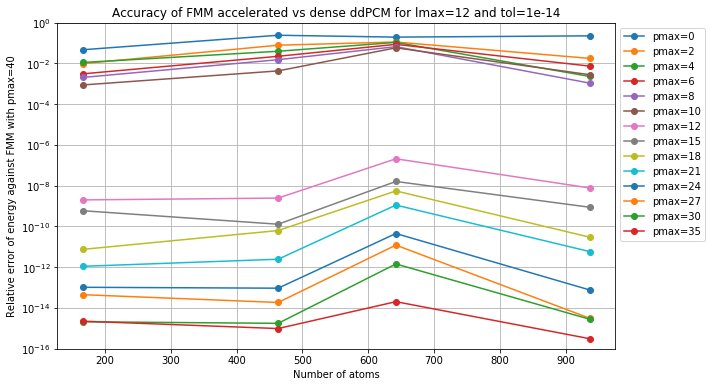

In [7]:
# Print data for lmax=12
lmax = 12
#pmaxs = [0, 6, 8, 10, 12, 15, 21, 30, 35, 40]
pmaxs = sorted(fmm_results[lmax].keys())[:-1]
baseline_energy = fmm_results[lmax][40]["energy"]
baseline_N = fmm_results[lmax][40]["N"]
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
#ax.scatter(baseline_N, baseline_energy, label="dense")
for pmax in pmaxs:
    fmm_energy = fmm_results[lmax][pmax]["energy"]
    fmm_N = fmm_results[lmax][pmax]["N"]
    if(len(baseline_N) != len(fmm_N)):
        print("pmax={} ignored due to incomplete data".format(pmax))
        continue
    diff = np.abs(fmm_energy-baseline_energy) / np.abs(baseline_energy)
    plt.plot(baseline_N, diff, label="pmax={}".format(pmax), marker="o")
ax.set_yscale("log")
ax.set_ylim([1e-16, 1e-0])
ax.set_yticks(1e-0 * 1e-2**np.arange(9))
ax.set_xlabel("Number of atoms")
ax.set_ylabel("Relative error of energy against FMM with pmax=40")
ax.set_title("Accuracy of FMM accelerated vs dense ddPCM for lmax={} and tol=1e-14".format(lmax))
ax.legend(bbox_to_anchor=(1,1))
ax.grid()